In [188]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [189]:
deliveries = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\MSD Analysis\\deliveries.csv")
matches = pd.read_csv("C:\\Users\\SHETTS60\\Documents\\Python scripts\\Cricket analytics Materials\\MSD Analysis\\matches.csv")

In [190]:
df = deliveries.copy()

In [86]:
df.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [87]:
# if value is 'nan' then type will be float. Other than nan type will be str, hence we will consider only value which has str type
def is_bowlers_wicket(player_dismissed, dismissal_kind):
    if type(player_dismissed ) == str:
        if dismissal_kind not in [ 'run out', 'retired hurt', 'obstructing the field']:
            return 1
        else:
            return 0
    else:
        return 0

In [88]:
df['isBowlerWk'] = df.apply(lambda x:is_bowlers_wicket(x["player_dismissed"],x["dismissal_kind"]),axis =1)

In [7]:
df["isDot"] = df["total_runs"].apply(lambda x:1 if x==0 else 0)
df["isOne"] = df["total_runs"].apply(lambda x:1 if x==1 else 0)
df["isTwo"] = df["total_runs"].apply(lambda x:1 if x==2 else 0)
df["isThree"] = df["total_runs"].apply(lambda x:1 if x==3 else 0)

df["isFour"] = df["batsman_runs"].apply(lambda x:1 if x==4 else 0)
df["isSix"] = df["batsman_runs"].apply(lambda x:1 if x==6 else 0)

In [8]:
runs = pd.DataFrame(df.groupby(["bowler"])["total_runs"].sum()).reset_index().rename(columns ={"total_runs":"runs"})
innings = pd.DataFrame(df.groupby(["bowler"])["match_id"].apply(lambda x: len(np.unique(x)))).reset_index().rename(columns ={"match_id":"innings"})
balls = pd.DataFrame(df.groupby(["bowler"])["match_id"].count()).reset_index().rename(columns ={"match_id":"balls"})
dismissals = pd.DataFrame(df.groupby(["bowler"])["isBowlerWk"].sum()).reset_index().rename(columns ={"isBowlerWk":"dismissals"})


In [9]:
dots = pd.DataFrame(df.groupby(["bowler"])["isDot"].sum()).reset_index().rename(columns ={"isDot":"dots"})
ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

In [10]:
pd.merge(innings,balls, on ="bowler").merge(runs, on ="bowler").merge(dismissals, on ="bowler").merge(dots, on ="bowler").merge(ones, on ="bowler").merge(twos, on ="bowler").merge(threes, on ="bowler").merge(fours, on ="bowler").merge(sixes, on ="bowler")

,bowler,innings,balls,runs,dismissals,dots,ones,twos,threes,fours,sixes
0,A Ashish Reddy,20,270,400,18,79,117,25,3,26,20
1,A Chandila,12,234,245,11,103,92,11,1,17,10
2,A Choudhary,5,108,144,5,42,38,9,0,13,6
3,A Dananjaya,1,25,48,0,6,10,3,0,2,4
4,A Flintoff,3,66,106,2,20,28,4,0,7,7
5,A Joseph,3,55,94,6,23,10,7,0,10,5
6,A Kumble,42,983,1089,45,374,430,64,3,72,35
7,A Mishra,147,3172,3850,156,1108,1414,251,6,218,170
8,A Mithun,16,312,477,7,90,138,20,1,42,21
9,A Nehra,88,1974,2537,106,798,700,108,8,279,76


In [89]:
def bowlerStats(df,current_innings):
    df = df[df.inning == current_innings]
    df.reset_index(inplace = True, drop = True)
    
    df["isDot"] = df["total_runs"].apply(lambda x:1 if x==0 else 0)
    df["isOne"] = df["total_runs"].apply(lambda x:1 if x==1 else 0)
    df["isTwo"] = df["total_runs"].apply(lambda x:1 if x==2 else 0)
    df["isThree"] = df["total_runs"].apply(lambda x:1 if x==3 else 0)

    df["isFour"] = df["batsman_runs"].apply(lambda x:1 if x==4 else 0)
    df["isSix"] = df["batsman_runs"].apply(lambda x:1 if x==6 else 0)
    
    runs = pd.DataFrame(df.groupby(["bowler"])["total_runs"].sum()).reset_index().rename(columns ={"total_runs":"runs"})
    innings = pd.DataFrame(df.groupby(["bowler"])["match_id"].apply(lambda x: len(np.unique(x)))).reset_index().rename(columns ={"match_id":"innings"})
    balls = pd.DataFrame(df.groupby(["bowler"])["match_id"].count()).reset_index().rename(columns ={"match_id":"balls"})
    dismissals = pd.DataFrame(df.groupby(["bowler"])["isBowlerWk"].sum()).reset_index().rename(columns ={"isBowlerWk":"dismissals"})

    dots = pd.DataFrame(df.groupby(["bowler"])["isDot"].sum()).reset_index().rename(columns ={"isDot":"dots"})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings,balls, on ="bowler").merge(runs, on ="bowler").merge(dismissals, on ="bowler").merge(dots, on ="bowler").merge(ones, on ="bowler").merge(twos, on ="bowler").merge(threes, on ="bowler").merge(fours, on ="bowler").merge(sixes, on ="bowler")
    df["dot%"] = df.apply(lambda x:100*(x['dots']/x['balls']), axis = 1)
    
    return df

In [90]:
df1 = bowlerStats(df,1)
df1.head(10)

,bowler,innings,balls,runs,dismissals,dots,ones,twos,threes,fours,sixes,dot%
0,A Ashish Reddy,8,98,148,7,26,45,9,1,10,7,26.530612
1,A Chandila,6,120,142,3,51,43,6,1,15,4,42.500000
2,A Choudhary,2,52,72,3,18,20,5,0,6,3,34.615385
3,A Flintoff,2,48,95,1,10,21,4,0,6,7,20.833333
4,A Joseph,1,13,23,0,4,5,1,0,1,2,30.769231
5,A Kumble,25,590,664,27,215,262,48,2,38,22,36.440678
6,A Mishra,67,1436,1748,60,497,645,109,3,106,74,34.610028
7,A Mithun,10,193,294,5,53,91,12,1,21,15,27.461140
8,A Nehra,44,1006,1304,59,405,353,62,5,136,42,40.258449
9,A Singh,13,301,414,18,112,105,26,2,43,11,37.209302


In [91]:
df2 = bowlerStats(df,2)
df2.head(10)

,bowler,innings,balls,runs,dismissals,dots,ones,twos,threes,fours,sixes,dot%
0,A Ashish Reddy,12,172,252,11,53,72,16,2,16,13,30.813953
1,A Chandila,6,114,103,8,52,49,5,0,2,6,45.614035
2,A Choudhary,3,56,72,2,24,18,4,0,7,3,42.857143
3,A Dananjaya,1,25,48,0,6,10,3,0,2,4,24.000000
4,A Flintoff,1,18,11,1,10,7,0,0,1,0,55.555556
5,A Joseph,2,42,71,6,19,5,6,0,9,3,45.238095
6,A Kumble,17,393,425,18,159,168,16,1,34,13,40.458015
7,A Mishra,80,1736,2102,96,611,769,142,3,112,96,35.195853
8,A Mithun,6,119,183,2,37,47,8,0,21,6,31.092437
9,A Nehra,44,968,1233,47,393,347,46,3,143,34,40.599174


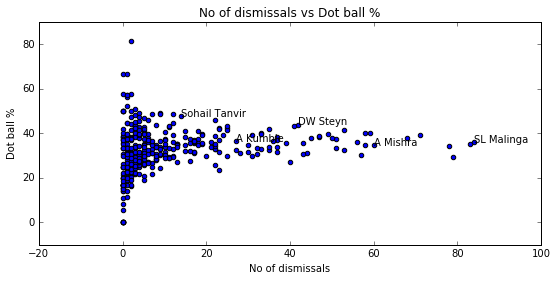

In [17]:
plt.figure(figsize = (9, 4))

plt.scatter(df1['dismissals'], df1['dot%'])
plt.xlabel('No of dismissals')
plt.ylabel('Dot ball %')
plt.title('No of dismissals vs Dot ball %')

selected_bowlers = ['A Kumble', 'SL Malinga', 'A Mishra', 'DW Steyn', 'Sohail Tanvir']
annotations = list(df1['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        plt.annotate(j, (df1['dismissals'][i], df1['dot%'][i]))

plt.show()

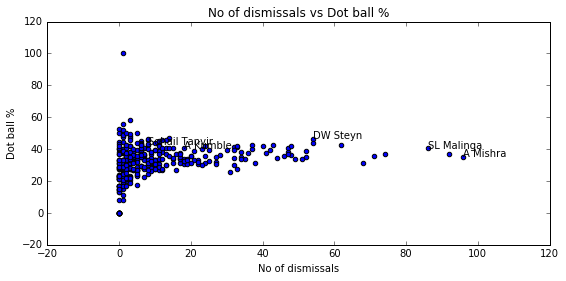

In [18]:
plt.figure(figsize = (9, 4))

plt.scatter(df2['dismissals'], df2['dot%'])
plt.xlabel('No of dismissals')
plt.ylabel('Dot ball %')
plt.title('No of dismissals vs Dot ball %')

selected_bowlers = ['A Kumble', 'SL Malinga', 'A Mishra', 'DW Steyn', 'Sohail Tanvir']
annotations = list(df2['bowler'])

for i, j in enumerate(annotations):
    if j in selected_bowlers:
        plt.annotate(j, (df2['dismissals'][i], df2['dot%'][i]))

plt.show()

In [19]:
df1['dot%'].mean(), df2['dot%'].mean()

(32.517257826565725, 32.11331248107269)

In [20]:
# use case 2: Bowler against all oppositions

In [21]:
#selected_player ="SL Malinga"

In [48]:
def show_player(selected_player):
    
    total_wickets = df[df.bowler == selected_player].groupby(['bowler'])['isBowlerWk'].sum().item()
    df[df["bowler"] == selected_player].groupby(["batting_team"])["isBowlerWk"].sum().sort_values(ascending = True).plot(kind ='barh')
    plt.title(selected_player + " - against all oppositions" + " (Wks :" + str(total_wickets) + ")")
    plt.xlabel('No of wickets')
    plt.ylabel('Opposition Teams')

    plt.show()


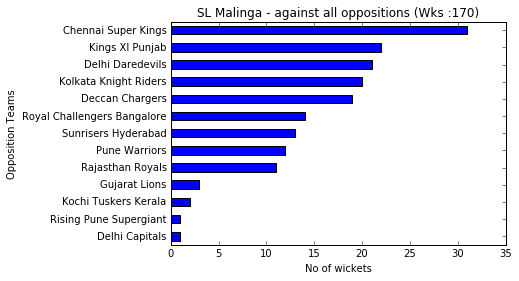

In [51]:
show_player("SL Malinga")

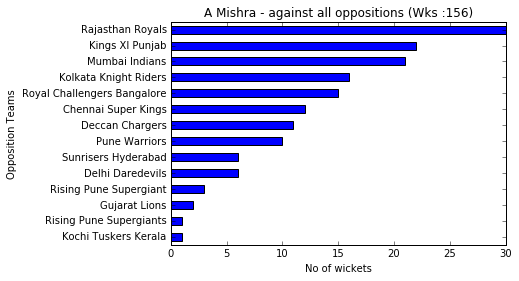

In [49]:
show_player("A Mishra")

## Toss Analysis & Venue Analysis: 

#### Toss Analysis

In [191]:
mdf = matches.copy()

In [192]:
mdf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [142]:
def wintoss_winmatch(toss_winner, winner):
    if toss_winner == winner:
        return 1
    else:
        return 0

In [143]:
mdf["wintoss_winmatch"] = mdf.apply(lambda x : wintoss_winmatch(x["toss_winner"], x["winner"]), axis =1)

In [96]:
mdf[["toss_winner","winner","wintoss_winmatch"]].head(2)

,toss_winner,winner,wintoss_winmatch
0,Royal Challengers Bangalore,Sunrisers Hyderabad,0
1,Rising Pune Supergiant,Rising Pune Supergiant,1


In [97]:
100* len(mdf[mdf["wintoss_winmatch"] == 1])/len(mdf)
#Toss doesnot play big role 

51.98412698412698

In [98]:
#according to each season
pd.DataFrame(100 * mdf.groupby(["season"])["wintoss_winmatch"].sum()/mdf.groupby(["season"])["wintoss_winmatch"].count())

,wintoss_winmatch
season,
2008,48.275862
2009,57.894737
2010,51.666667
2011,52.054795
2012,44.594595
2013,47.368421
2014,50.000000
2015,47.457627
2016,56.666667


#### Venue Analysis

In [193]:
mdf = mdf.rename(columns ={"id":"match_id"})

In [194]:
cdf = pd.merge(df,mdf, on ='match_id', how = 'left' )

In [146]:
#Total no of runs in the Venue
cdf.groupby(["venue"])["total_runs"].sum()

venue
ACA-VDCA Stadium                                        658  
Barabati Stadium                                        2278 
Brabourne Stadium                                       3842 
Buffalo Park                                            799  
De Beers Diamond Oval                                   897  
Dr DY Patil Sports Academy                              4810 
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     3121 
Dubai International Cricket Stadium                     2064 
Eden Gardens                                            23857
Feroz Shah Kotla                                        20896
Feroz Shah Kotla Ground                                 2260 
Green Park                                              1298 
Himachal Pradesh Cricket Association Stadium            2897 
Holkar Cricket Stadium                                  2920 
IS Bindra Stadium                                       2483 
JSCA International Stadium Complex                      2056 
Ki

In [147]:
#Total no of matched in the Venue
cdf.groupby(["venue"])["match_id"].apply(lambda x: len(np.unique(x)))

venue
ACA-VDCA Stadium                                        2 
Barabati Stadium                                        7 
Brabourne Stadium                                       11
Buffalo Park                                            3 
De Beers Diamond Oval                                   3 
Dr DY Patil Sports Academy                              17
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Dubai International Cricket Stadium                     7 
Eden Gardens                                            77
Feroz Shah Kotla                                        67
Feroz Shah Kotla Ground                                 7 
Green Park                                              4 
Himachal Pradesh Cricket Association Stadium            9 
Holkar Cricket Stadium                                  9 
IS Bindra Stadium                                       7 
JSCA International Stadium Complex                      7 
Kingsmead                                         

In [148]:
#Runs scored in each match
cdf.groupby(["venue"])["total_runs"].sum()/cdf.groupby(["venue"])["match_id"].apply(lambda x: len(np.unique(x)))

venue
ACA-VDCA Stadium                                        329.000000
Barabati Stadium                                        325.428571
Brabourne Stadium                                       349.272727
Buffalo Park                                            266.333333
De Beers Diamond Oval                                   299.000000
Dr DY Patil Sports Academy                              282.941176
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     283.727273
Dubai International Cricket Stadium                     294.857143
Eden Gardens                                            309.831169
Feroz Shah Kotla                                        311.880597
Feroz Shah Kotla Ground                                 322.857143
Green Park                                              324.500000
Himachal Pradesh Cricket Association Stadium            321.888889
Holkar Cricket Stadium                                  324.444444
IS Bindra Stadium                                       

In [149]:
#Runs scored in each innings
vdf =pd.DataFrame(cdf.groupby(["venue"])["total_runs"].sum()/(cdf.groupby(["venue"])["match_id"].apply(lambda x: len(np.unique(x)))*2))

In [150]:
vdf.columns = ['avg_runs']

In [151]:
vdf.sort_values('avg_runs', ascending = False)

,avg_runs
venue,
IS Bindra Stadium,177.357143
Brabourne Stadium,174.636364
M. Chinnaswamy Stadium,167.357143
"Punjab Cricket Association IS Bindra Stadium, Mohali",167.178571
Saurashtra Cricket Association Stadium,166.650000
ACA-VDCA Stadium,164.500000
Rajiv Gandhi Intl. Cricket Stadium,163.812500
Maharashtra Cricket Association Stadium,163.595238
Barabati Stadium,162.714286


## Problem Statement:

### What is the optimal bowling strategy in Chinnaswamy, Which type of bowlers to use & when (phase of play)?

In [207]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return "Middle"
    else:
        return 'Death'

In [208]:
cdf['phase'] = cdf["over"].apply(lambda x:phase(x))

In [209]:
def balls_per_dismissal(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
#         return math.inf
        return balls/1
    
def runs_per_ball(runs_conceeded, balls):
    if balls > 0:
        return runs_conceeded/balls
    else:
        return 1000
    
def runs_per_dismissal(runs_conceeded, dismissals):
    if dismissals > 0:
        return runs_conceeded/dismissals
    elif (runs_conceeded == 0):
        return 1000
    else:
        return runs_conceeded/1

In [210]:
cdf.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,phase
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Powerplay
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Powerplay


In [211]:
def ByCustom(df,current_phase,current_venue):
    df = df[df.phase == current_phase]
    df = df[df.venue == current_venue]
    df.reset_index(inplace = True, drop = True)
    
    
    df['isBowlerWk'] = df.apply(lambda x:is_bowlers_wicket(x["player_dismissed"],x["dismissal_kind"]),axis =1)
    df["isDot"] = df["total_runs"].apply(lambda x:1 if x==0 else 0)
    df["isOne"] = df["total_runs"].apply(lambda x:1 if x==1 else 0)
    df["isTwo"] = df["total_runs"].apply(lambda x:1 if x==2 else 0)
    df["isThree"] = df["total_runs"].apply(lambda x:1 if x==3 else 0)

    df["isFour"] = df["batsman_runs"].apply(lambda x:1 if x==4 else 0)
    df["isSix"] = df["batsman_runs"].apply(lambda x:1 if x==6 else 0)

    runs = pd.DataFrame(df.groupby(["bowler"])["total_runs"].sum()).reset_index().rename(columns ={"total_runs":"runs"})
    innings = pd.DataFrame(df.groupby(["bowler"])["match_id"].apply(lambda x: len(np.unique(x)))).reset_index().rename(columns ={"match_id":"innings"})
    balls = pd.DataFrame(df.groupby(["bowler"])["match_id"].count()).reset_index().rename(columns ={"match_id":"balls"})
    dismissals = pd.DataFrame(df.groupby(["bowler"])["isBowlerWk"].sum()).reset_index().rename(columns ={"isBowlerWk":"dismissals"})

    dots = pd.DataFrame(df.groupby(["bowler"])["isDot"].sum()).reset_index().rename(columns ={"isDot":"dots"})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings,balls, on ="bowler").merge(runs, on ="bowler").merge(dismissals, on ="bowler").merge(dots, on ="bowler").merge(ones, on ="bowler").merge(twos, on ="bowler").merge(threes, on ="bowler").merge(fours, on ="bowler").merge(sixes, on ="bowler")
    df["dot%"] = df.apply(lambda x:100*(x['dots']/x['balls']), axis = 1)
    
    # balls_per_dismissal, runs_per_ball, runs_per_dismissal
    df["SR"] = df.apply(lambda x: balls_per_dismissal(x["balls"],x["dismissals"]),axis =1)
    #We calculate runs_per_ball, to get runs per over we multiply with 6
    df["Eco"] = df.apply(lambda x: 6 * runs_per_ball(x["runs"],x["balls"]),axis =1)
    df["Avg"] = df.apply(lambda x: runs_per_dismissal(x["runs"],x["dismissals"]),axis =1)
    
    return df

In [212]:
df1 = ByCustom(cdf,"Powerplay","M Chinnaswamy Stadium")
df2 = ByCustom(cdf,"Middle","M Chinnaswamy Stadium")
df3 = ByCustom(cdf,"Death","M Chinnaswamy Stadium")

In [218]:
df1[df1.balls >= 25].sort_values(["dot%","SR","Eco","Avg"], ascending = (False , True,True,True)).head(5)

,bowler,innings,balls,runs,dismissals,dots,ones,twos,threes,fours,sixes,dot%,SR,Eco,Avg
52,Harbhajan Singh,4,42,42,1,29,6,0,0,3,4,69.047619,42.000000,6.000000,42.000000
65,JJ Bumrah,5,40,25,3,25,11,1,0,3,0,62.500000,13.333333,3.750000,8.333333
20,B Kumar,7,88,77,4,55,19,1,0,11,2,62.500000,22.000000,5.250000,19.250000
134,SP Narine,7,48,40,2,28,12,2,0,6,0,58.333333,24.000000,5.000000,20.000000
138,Sandeep Sharma,6,91,103,7,53,17,3,0,14,4,58.241758,13.000000,6.791209,14.714286


In [183]:
df2.head(5)

,bowler,innings,balls,runs,dismissals,dots,ones,twos,threes,fours,sixes,dot%,SR,Eco,Avg
0,A Ashish Reddy,20,270,400,18,79,117,25,3,26,20,29.259259,15.000000,8.888889,22.222222
1,A Chandila,12,234,245,11,103,92,11,1,17,10,44.017094,21.272727,6.282051,22.272727
2,A Choudhary,5,108,144,5,42,38,9,0,13,6,38.888889,21.600000,8.000000,28.800000
3,A Dananjaya,1,25,48,0,6,10,3,0,2,4,24.000000,25.000000,11.520000,48.000000
4,A Flintoff,3,66,106,2,20,28,4,0,7,7,30.303030,33.000000,9.636364,53.000000


In [214]:
df3.head(5)

,bowler,innings,balls,runs,dismissals,dots,ones,twos,threes,fours,sixes,dot%,SR,Eco,Avg
0,A Ashish Reddy,2,12,24,2,3,4,2,0,1,2,25.000000,6.0,12.000000,12.0
1,A Chandila,1,6,6,0,1,4,1,0,0,0,16.666667,6.0,6.000000,6.0
2,A Choudhary,1,12,11,1,6,3,2,0,1,0,50.000000,12.0,5.500000,11.0
3,A Kumble,9,51,66,5,18,24,1,0,4,4,35.294118,10.2,7.764706,13.2
4,A Mishra,1,8,21,0,1,3,1,0,1,2,12.500000,8.0,15.750000,21.0
